In [99]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [100]:
# Loading the data
df = pd.read_csv('/content/framingham.csv')

In [101]:
# Print the shape of the data
df.shape

(4240, 16)

In [102]:
df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [103]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [104]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [105]:
import pandas as pd

# Assuming df is your DataFrame
df.fillna(df.mean(), inplace=True)


In [106]:
import pandas as pd

# Assuming df is your DataFrame
df.fillna(df.mean(), inplace=True)

# Check for missing values after mean imputation
missing_values_after_imputation = df.isnull().sum()

# Print the result
print("Missing Values After Mean Imputation:")
print(missing_values_after_imputation)


Missing Values After Mean Imputation:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


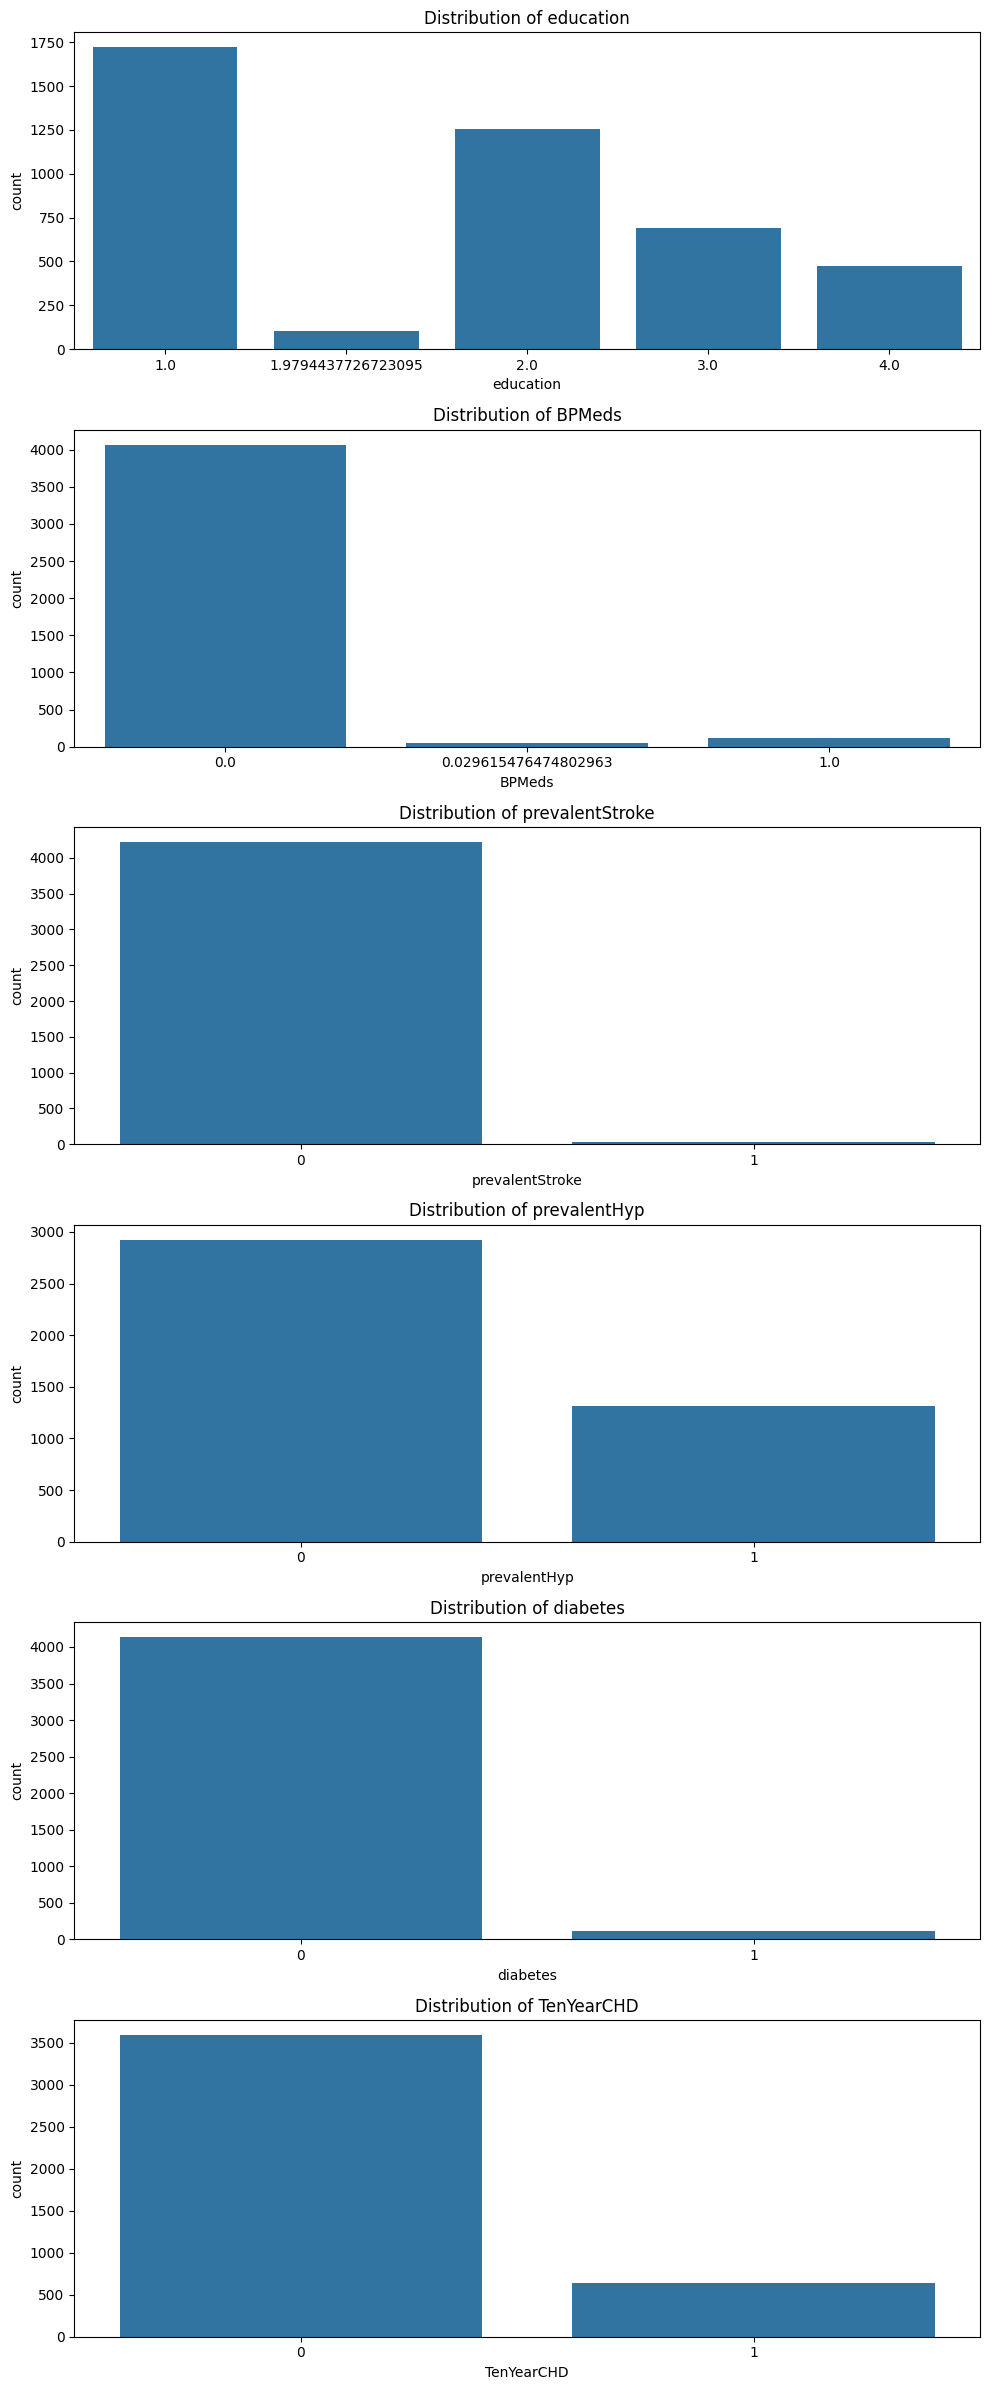

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'categorical_columns' with the actual names of your categorical columns
categorical_columns = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# Set up subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 4 * len(categorical_columns)))

# Iterate through categorical columns and create bar plots
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


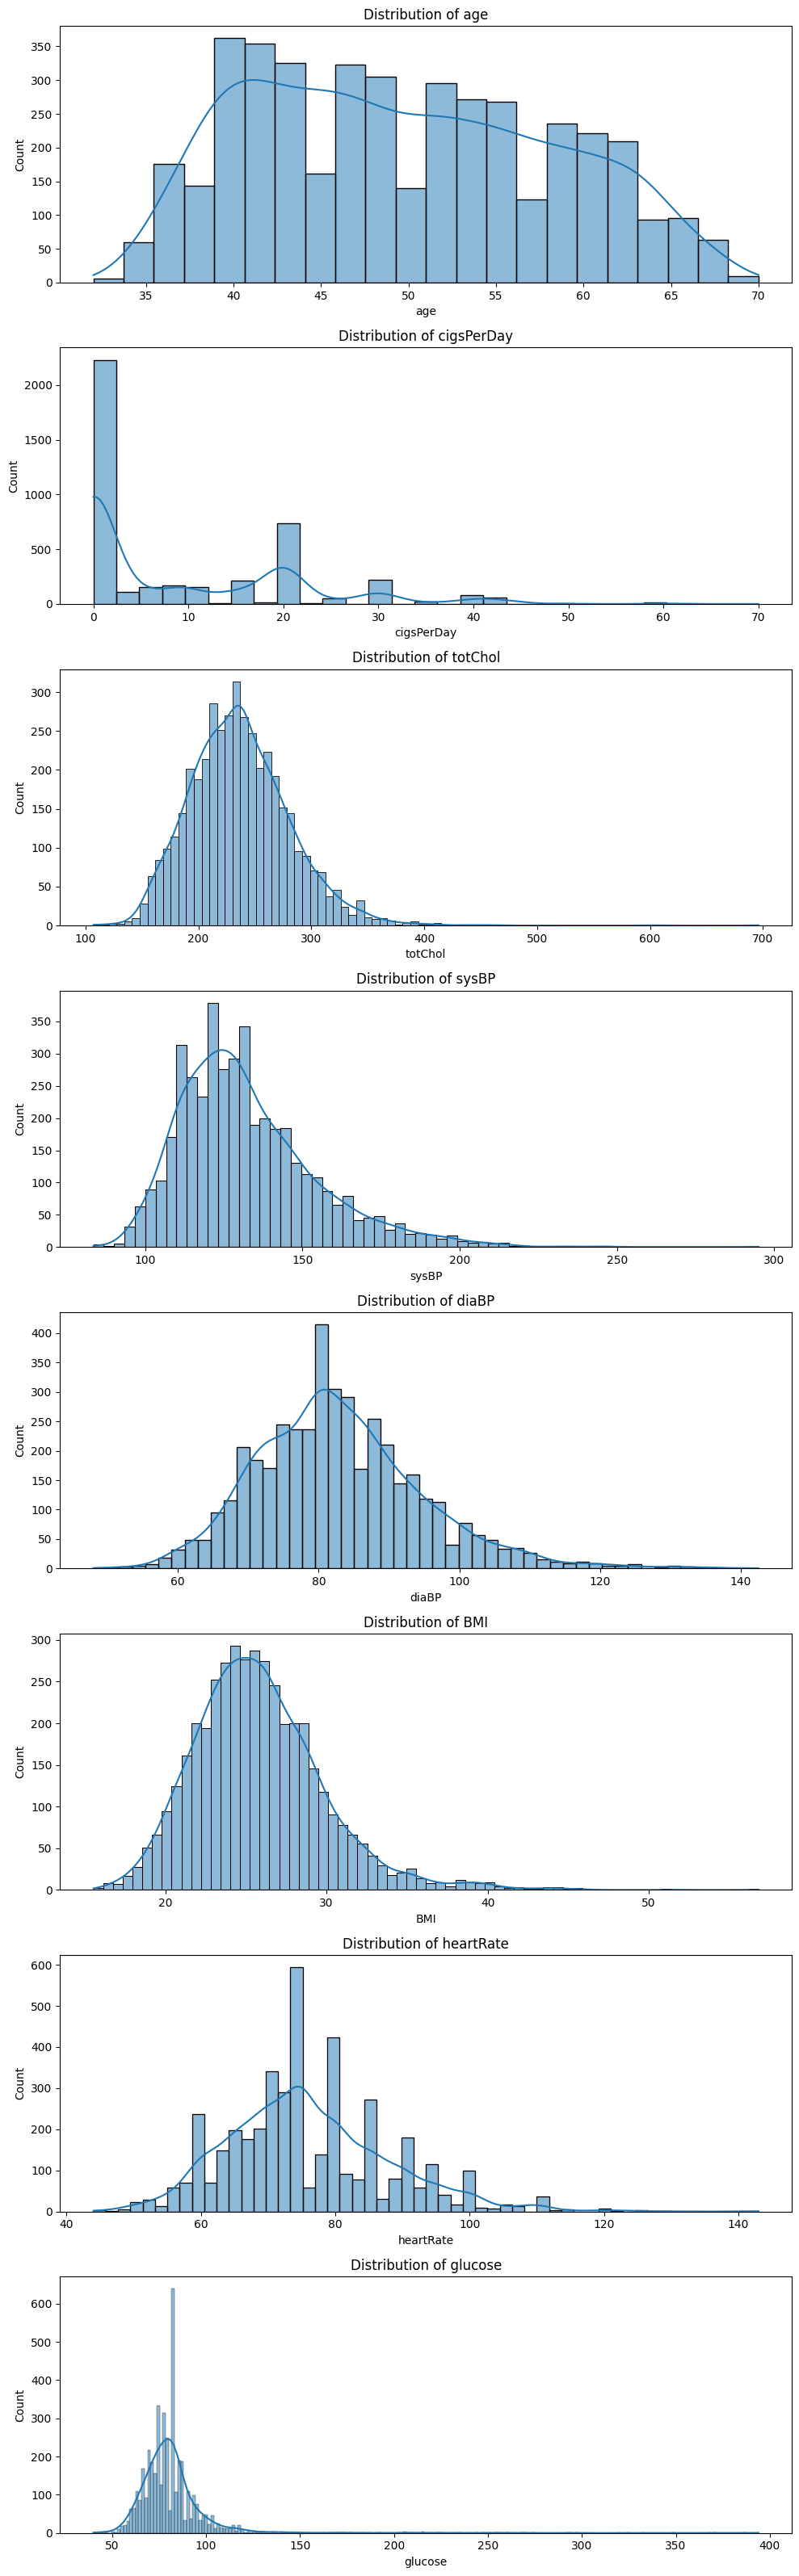

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'numerical_columns' with the actual names of your numerical columns
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Set up subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))

# Iterate through numerical columns and create histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [109]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


In [110]:
# Splitting  the data into training set  and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
print(X_train.columns)
print(X_test.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


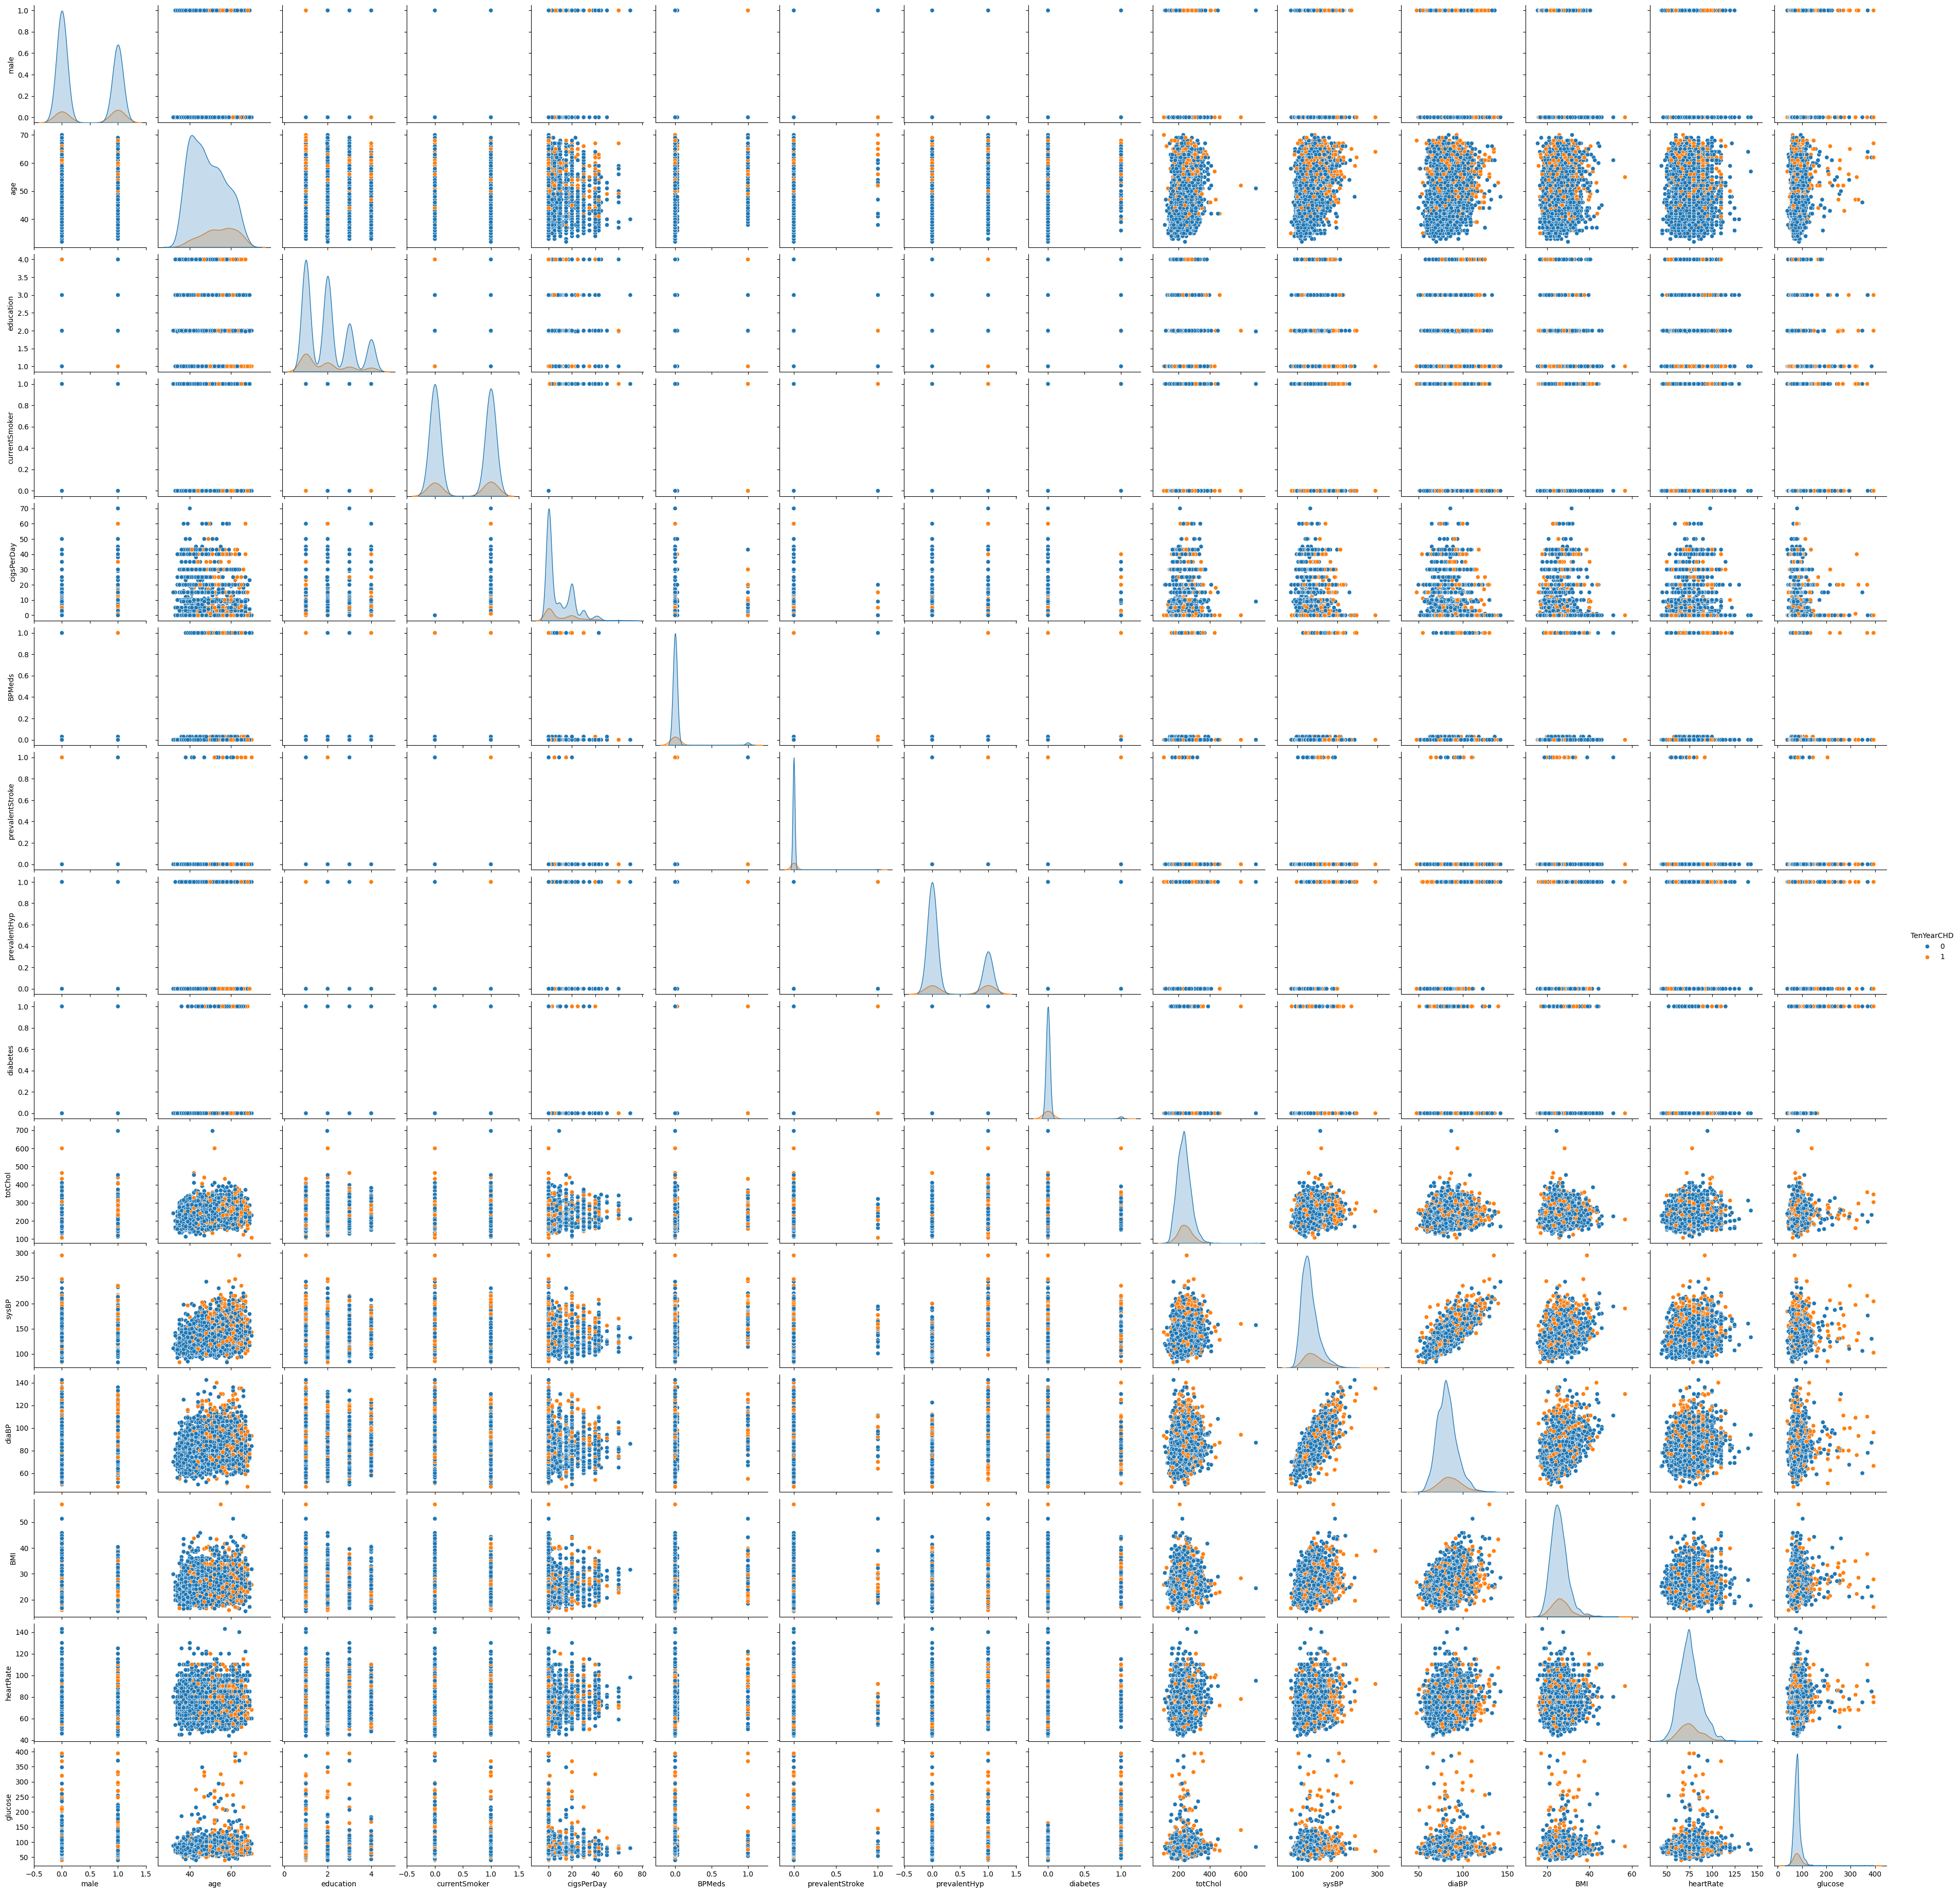

In [112]:
# Exploratory Data Analysis (EDA)
# Pair plots for relationships between numerical features
sns.pairplot(df, hue='TenYearCHD', diag_kind='kde')
plt.show()

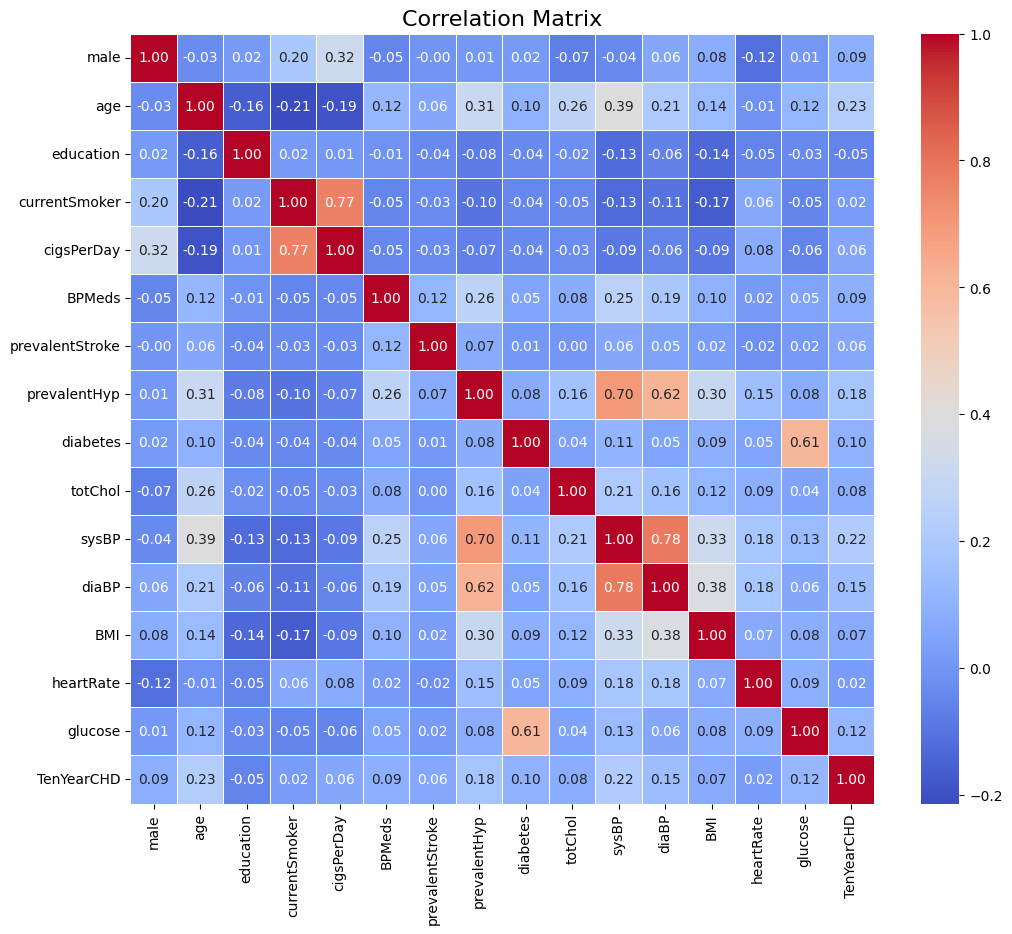

In [113]:
# Correlation matrix heatmap with larger figure size and clearer annotations
correlation_matrix = df.corr()

# Set up a larger figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the font size for annotations
plt.tick_params(axis='both', labelsize=10)

# Add a title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()


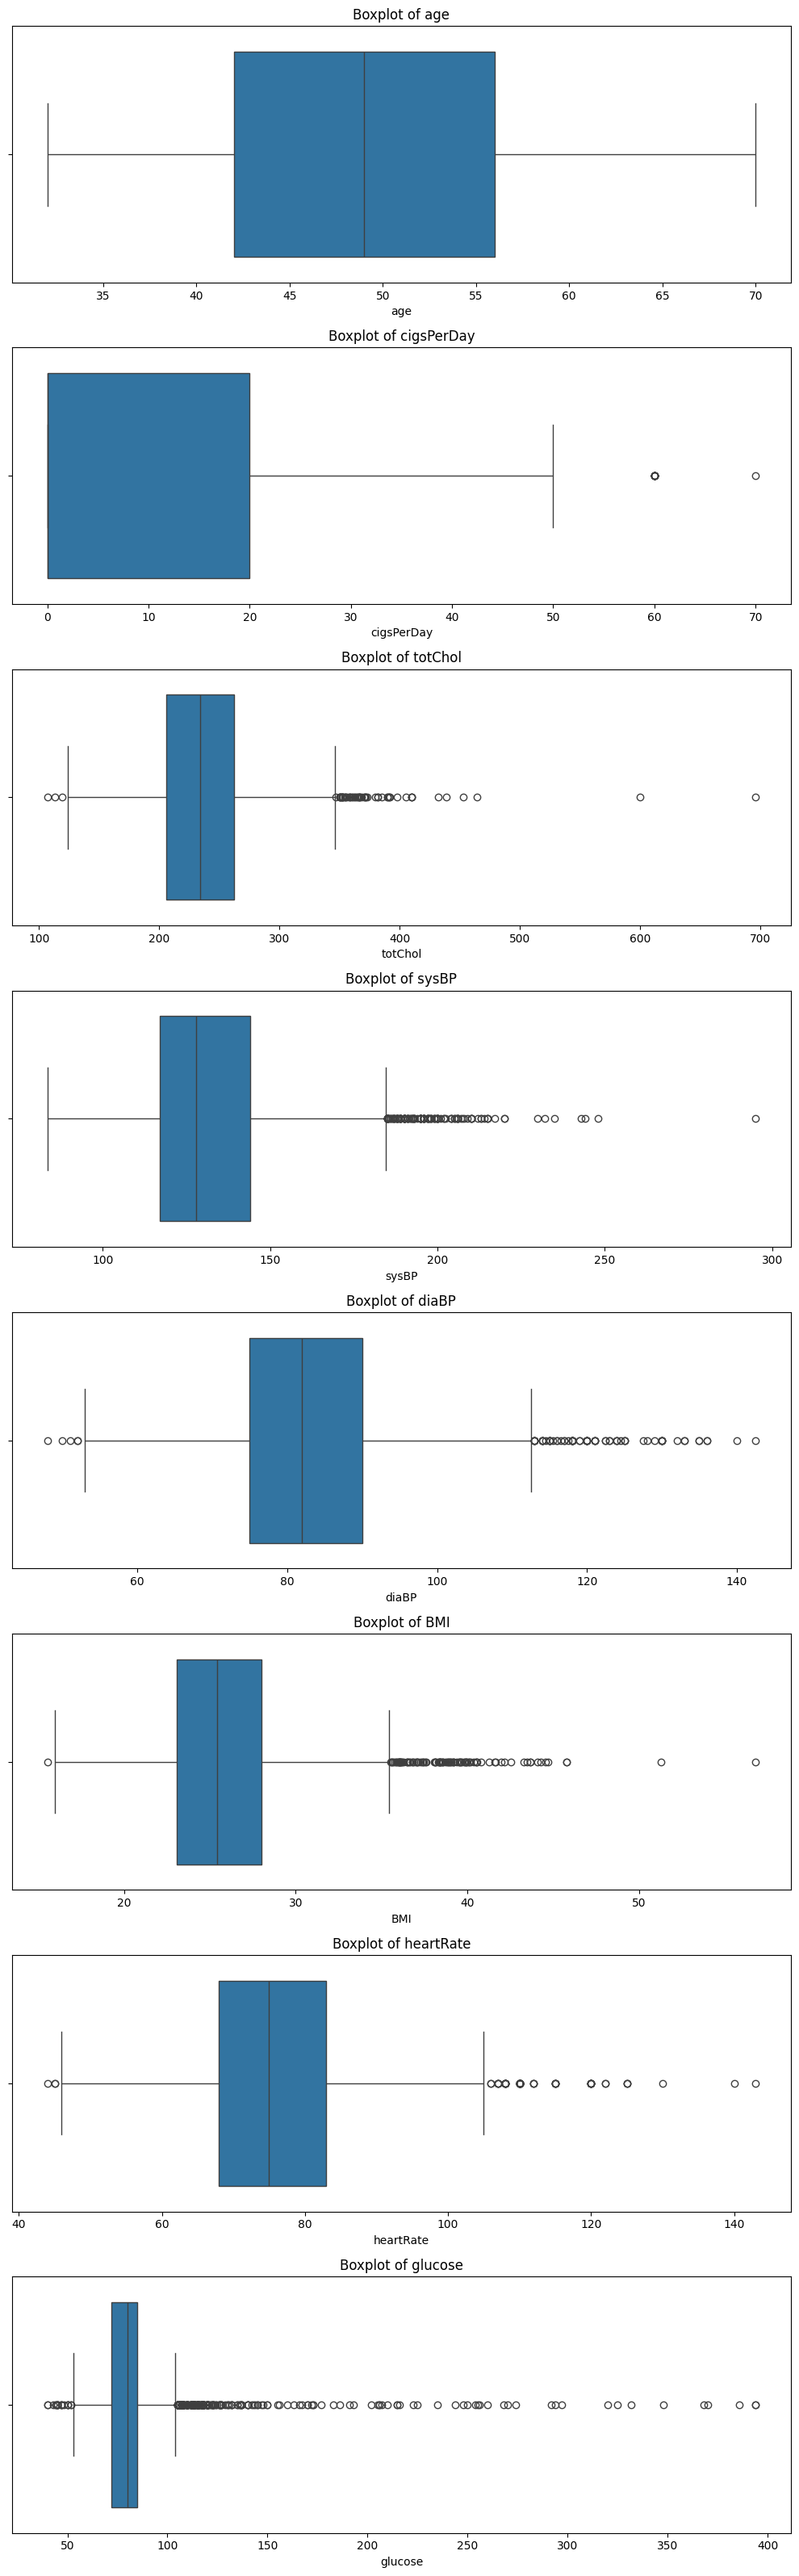

In [114]:
# Box plots for outlier detection in numerical features
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [115]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assume you have your features (X) and target variable (y) defined

# Perform oversampling on the training set using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the oversampled data

# Continue with model training and testing using the resampled data


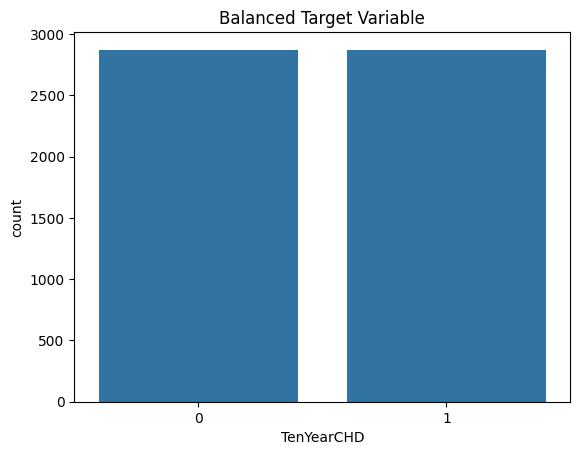

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train_resampled is your resampled target variable
sns.countplot(x=y_train_resampled)
plt.title("Balanced Target Variable")
plt.show()


In [117]:
# SVM model with GridSearchCV
svm = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [118]:
grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [119]:
# Best hyperparameters
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters: {best_params_svm}")

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Creating a pipeline with scaling and SVM
svm_model = make_pipeline(StandardScaler(), SVC())

# GridSearchCV for hyperparameter tuning
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
}

grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters (SVM): {best_params_svm}")

# Model with the best hyperparameters for SVM
model_svm = SVC(C=best_params_svm['svc__C'], kernel=best_params_svm['svc__kernel'], gamma=best_params_svm['svc__gamma'], random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Evaluate on the testing set
y_pred_svm = model_svm.predict(X_test_scaled)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Testing Accuracy with SVM: {accuracy_svm:.2f}")


Best Hyperparameters (SVM): {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Testing Accuracy with SVM: 0.85


In [121]:
from sklearn.metrics import accuracy_score

# Evaluate on the training set
y_pred_svm_train = model_svm.predict(X_train_scaled)

# Training Accuracy
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print(f"Training Accuracy with SVM: {accuracy_svm_train:.2f}")


Training Accuracy with SVM: 0.86


In [123]:
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1')

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GridSearchCV for hyperparameter tuning with additional parameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters (Decision Tree): {best_params_dt}")

# Model with the best hyperparameters for Decision Tree
model_dt = DecisionTreeClassifier(**best_params_dt)
model_dt.fit(X_train, y_train)

# Evaluate on the testing set
y_pred_dt_test = model_dt.predict(X_test)

# Testing Accuracy
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print(f"Testing Accuracy with Decision Tree: {accuracy_dt_test:.2f}")

# Evaluate on the training set
y_pred_dt_train = model_dt.predict(X_train)

# Training Accuracy
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print(f"Training Accuracy with Decision Tree: {accuracy_dt_train:.2f}")


Best Hyperparameters (Decision Tree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Testing Accuracy with Decision Tree: 0.85
Training Accuracy with Decision Tree: 0.86


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Creating a pipeline with scaling and Logistic Regression
logreg_model = make_pipeline(StandardScaler(), LogisticRegression())

# GridSearchCV for hyperparameter tuning
param_grid_logreg = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__penalty': ['l2'],  # Use only 'l2' penalty for 'lbfgs' solver
}

grid_search_logreg = GridSearchCV(logreg_model, param_grid=param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
best_params_logreg = grid_search_logreg.best_params_
print(f"Best Hyperparameters (Logistic Regression): {best_params_logreg}")

# Model with the best hyperparameters for Logistic Regression
model_logreg = make_pipeline(StandardScaler(), LogisticRegression(C=best_params_logreg['logisticregression__C'], penalty=best_params_logreg['logisticregression__penalty'], solver='lbfgs'))
model_logreg.fit(X_train, y_train)

# Evaluate on the testing set
y_pred_logreg_test = model_logreg.predict(X_test)

# Testing Accuracy
accuracy_logreg_test = accuracy_score(y_test, y_pred_logreg_test)
print(f"Testing Accuracy with Logistic Regression: {accuracy_logreg_test:.2f}")

# Evaluate on the training set
y_pred_logreg_train = model_logreg.predict(X_train)

# Training Accuracy
accuracy_logreg_train = accuracy_score(y_train, y_pred_logreg_train)
print(f"Training Accuracy with Logistic Regression: {accuracy_logreg_train:.2f}")


Best Hyperparameters (Logistic Regression): {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
Testing Accuracy with Logistic Regression: 0.86
Training Accuracy with Logistic Regression: 0.86


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GridSearchCV for hyperparameter tuning with additional parameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters (Decision Tree): {best_params_dt}")

# Model with the best hyperparameters for Decision Tree
model_dt = DecisionTreeClassifier(**best_params_dt)
model_dt.fit(X_train, y_train)

# Evaluate on the testing set
y_pred_dt_test = model_dt.predict(X_test)

# Testing Accuracy
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print(f"Testing Accuracy with Decision Tree: {accuracy_dt_test:.2f}")

# Evaluate on the training set
y_pred_dt_train = model_dt.predict(X_train)

# Training Accuracy
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print(f"Training Accuracy with Decision Tree: {accuracy_dt_train:.2f}")


Best Hyperparameters (Decision Tree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing Accuracy with Decision Tree: 0.85
Training Accuracy with Decision Tree: 0.86


Threshold: 0.10
Precision: 0.22
Recall: 0.83
ROC AUC: 0.73

Threshold: 0.20
Precision: 0.31
Recall: 0.53
ROC AUC: 0.73

Threshold: 0.30
Precision: 0.37
Recall: 0.28
ROC AUC: 0.73

Threshold: 0.40
Precision: 0.48
Recall: 0.14
ROC AUC: 0.73

Threshold: 0.50
Precision: 0.69
Recall: 0.09
ROC AUC: 0.73

Threshold: 0.60
Precision: 0.73
Recall: 0.04
ROC AUC: 0.73

Threshold: 0.70
Precision: 0.83
Recall: 0.02
ROC AUC: 0.73

Threshold: 0.80
Precision: 0.75
Recall: 0.00
ROC AUC: 0.73

Threshold: 0.90
Precision: 1.00
Recall: 0.00
ROC AUC: 0.73



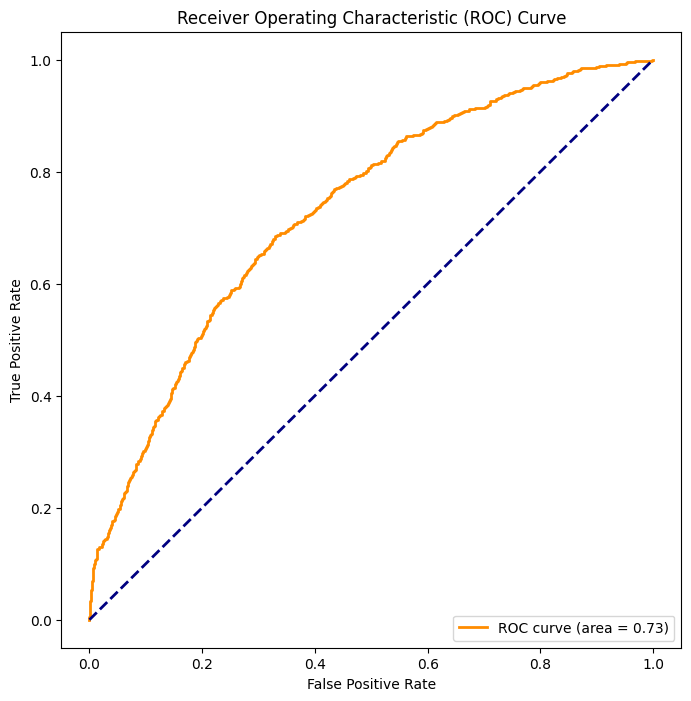

In [127]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities from the logistic regression model
predicted_probabilities = model_logreg.predict_proba(X)[:, 1]

# Evaluate precision, recall, and ROC AUC for various thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    predictions_threshold = (predicted_probabilities >= threshold).astype(int)

    precision = precision_score(y, predictions_threshold)
    recall = recall_score(y, predictions_threshold)
    roc_auc = roc_auc_score(y, predicted_probabilities)

    print(f"Threshold: {threshold:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, predicted_probabilities)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


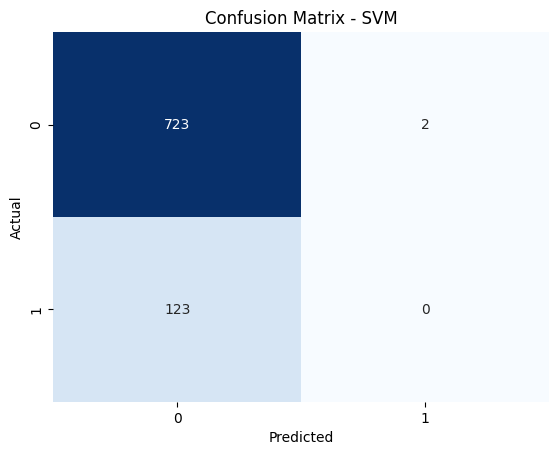

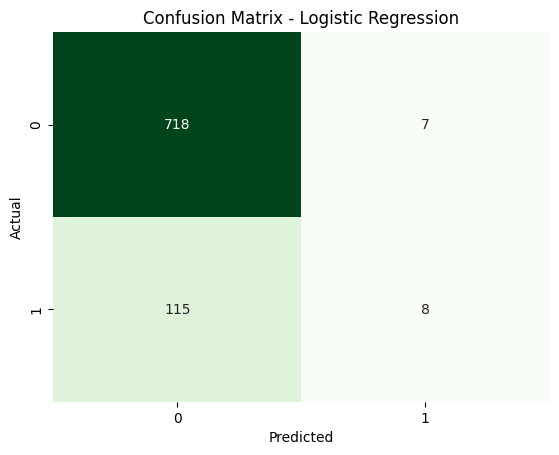

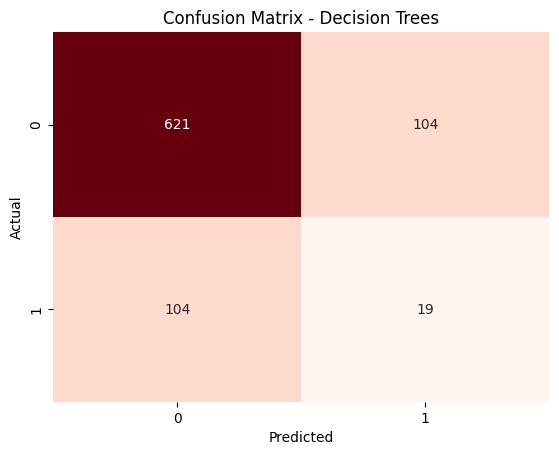

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test, y_pred_svm, y_pred_logreg, and y_pred_dt are defined

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Trees
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings

# Assuming you have features (X) and target variable (y) defined

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
mean_accuracy_dt = cv_scores_dt.mean()
std_dev_dt = cv_scores_dt.std()

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cv_scores_logreg = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
mean_accuracy_logreg = cv_scores_logreg.mean()
std_dev_logreg = cv_scores_logreg.std()

# SVM
svm_model = SVC(random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cv_scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
mean_accuracy_svm = cv_scores_svm.mean()
std_dev_svm = cv_scores_svm.std()

# Display results
print("Decision Tree:")
print("Mean Accuracy:", mean_accuracy_dt)
print("Standard Deviation:", std_dev_dt)

print("\nLogistic Regression:")
print("Mean Accuracy:", mean_accuracy_logreg)
print("Standard Deviation:", std_dev_logreg)

print("\nSVM:")
print("Mean Accuracy:", mean_accuracy_svm)
print("Standard Deviation:", std_dev_svm)


Decision Tree:
Mean Accuracy: 0.7608490566037736
Standard Deviation: 0.013308241490250842

Logistic Regression:
Mean Accuracy: 0.8507075471698112
Standard Deviation: 0.0024282146558931715

SVM:
Mean Accuracy: 0.847877358490566
Standard Deviation: 0.0007458202028699095
